In [ ]:
import pandas as pd
data = pd.read_csv('n11611553_CombinedTrainingData.csv')
data.head()

,meanX,sdX,rangeX,meanY,sdY,rangeY,meanZ,sdZ,rangeZ,wristArmed,label,studentId
0,1.0006,0.1730,0.8057,-0.1131,0.1161,0.3876,0.0467,0.1620,0.7362,0,push,11611553
1,0.9768,0.2013,0.8768,-0.0760,0.0752,0.2516,-0.0662,0.1599,0.6814,0,push,11611553
2,0.9677,0.2148,0.8992,-0.0369,0.0816,0.2884,0.0211,0.1927,0.8004,0,push,11611553
3,1.0195,0.1974,0.9463,-0.1615,0.2047,0.5827,0.0434,0.1089,0.4874,0,push,11611553
4,1.1079,0.2373,0.6573,0.1333,0.0180,0.0415,0.3735,0.1420,0.3836,0,push,11611553


# SVM Framework for Motion Data Classification

This notebook provides a framework for classifying motion data using Support Vector Machines (SVM). 
The data contains accelerometer features (mean, standard deviation, range) for X, Y, Z axes along with wrist position and activity labels.

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Set random state for reproducibility
RANDOM_STATE = 42

## Step 1: Data Exploration and Understanding

In [ ]:
# Load and explore the data
data = pd.read_csv('n11611553_CombinedTrainingData.csv')

print("Dataset Shape:", data.shape)
print("\nColumn Names:")
print(data.columns.tolist())
print("\nData Types:")
print(data.dtypes)
print("\nFirst few rows:")
print(data.head())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Check class distribution
print("\nClass Distribution:")
print(data['label'].value_counts())

# Basic statistics
print("\nBasic Statistics:")
print(data.describe())

Dataset Shape: (16185, 12)

Column Names:
['meanX', 'sdX', 'rangeX', 'meanY', 'sdY', 'rangeY', 'meanZ', 'sdZ', 'rangeZ', 'wristArmed', 'label', 'studentId']

Data Types:
meanX         float64
sdX           float64
rangeX        float64
meanY         float64
sdY           float64
rangeY        float64
meanZ         float64
sdZ           float64
rangeZ        float64
wristArmed      int64
label          object
studentId       int64
dtype: object

First few rows:
    meanX     sdX  rangeX   meanY     sdY  rangeY   meanZ     sdZ  rangeZ  \
0  0.0049  0.0046  0.0156 -0.3972  0.0064  0.0303 -0.9036  0.0027  0.0113   
1  0.0097  0.0068  0.0274 -0.3963  0.0058  0.0260 -0.9045  0.0015  0.0055   
2  0.0130  0.0066  0.0223 -0.3940  0.0073  0.0288 -0.9050  0.0031  0.0151   
3  0.0203  0.0124  0.0439 -0.3937  0.0167  0.0750 -0.9051  0.0046  0.0174   
4  0.0274  0.0129  0.0439 -0.3943  0.0176  0.0750 -0.9051  0.0047  0.0174   

   wristArmed  label  studentId  
0           0  still   11965827  
1   

## Step 2: Data Visualization

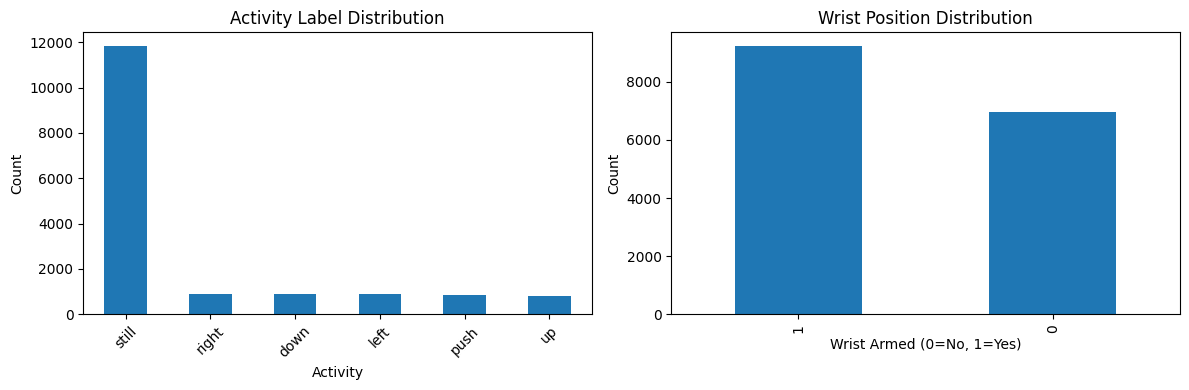

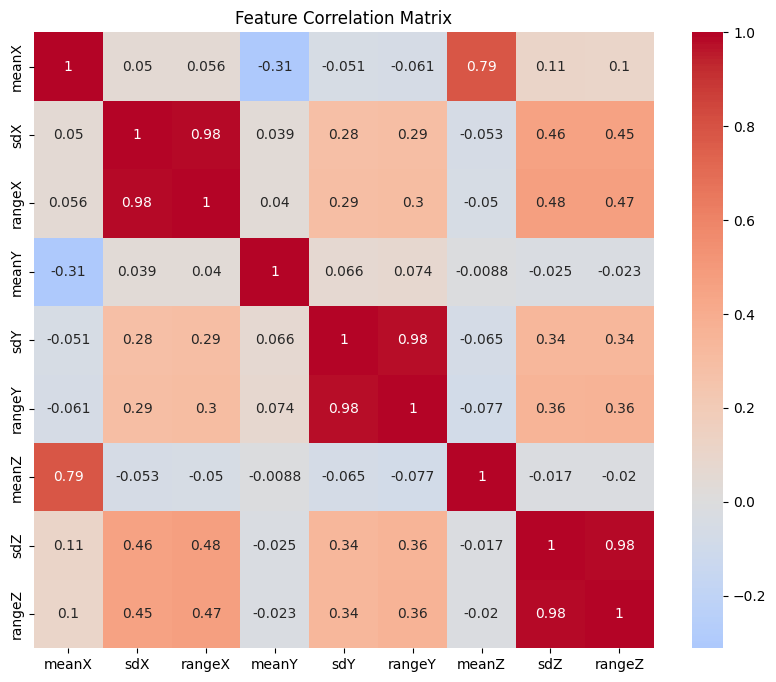

In [ ]:
# Visualize class distribution
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
data['label'].value_counts().plot(kind='bar')
plt.title('Activity Label Distribution')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Correlation matrix of numerical features
numerical_features = ['meanX', 'sdX', 'rangeX', 'meanY', 'sdY', 'rangeY', 'meanZ', 'sdZ', 'rangeZ']
plt.figure(figsize=(10, 8))
correlation_matrix = data[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

## Step 3: Data Preprocessing

In [ ]:
# Define features and target
feature_columns = ['meanX', 'sdX', 'rangeX', 'meanY', 'sdY', 'rangeY', 
                  'meanZ', 'sdZ', 'rangeZ', 'wristArmed']
X = data[feature_columns]
y = data['label']

print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)
print("\nFeatures being used:")
for i, feature in enumerate(feature_columns):
    print(f"{i+1}. {feature}")

# Encode categorical labels if needed
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
print(f"\nLabel encoding mapping:")
for i, label in enumerate(label_encoder.classes_):
    print(f"{label} -> {i}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=RANDOM_STATE, stratify=y_encoded
)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Feature scaling (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeature scaling completed.")

Feature matrix shape: (16185, 10)
Target vector shape: (16185,)

Features being used:
1. meanX
2. sdX
3. rangeX
4. meanY
5. sdY
6. rangeY
7. meanZ
8. sdZ
9. rangeZ
10. wristArmed

Label encoding mapping:
down -> 0
left -> 1
push -> 2
right -> 3
still -> 4
up -> 5

Training set size: 12948
Test set size: 3237

Feature scaling completed.


## Step 4: SVM Model Training and Hyperparameter Tuning

In [25]:
# Basic SVM model
print("Training basic SVM model...")
svm_basic = SVC(random_state=RANDOM_STATE)
svm_basic.fit(X_train_scaled, y_train)

# Cross-validation score for basic model
cv_scores_basic = cross_val_score(svm_basic, X_train_scaled, y_train, cv=5)
print(f"Basic SVM Cross-validation accuracy: {cv_scores_basic.mean():.4f} (+/- {cv_scores_basic.std() * 2:.4f})")

# Hyperparameter tuning with GridSearchCV
print("\nPerforming hyperparameter tuning...")
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

# Use a smaller grid for faster execution if needed
# param_grid = {
#     'C': [0.1, 1, 10],
#     'gamma': ['scale', 0.01, 0.1],
#     'kernel': ['rbf', 'linear']
# }

grid_search = GridSearchCV(
    SVC(random_state=RANDOM_STATE),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,  # Use all available cores
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)

print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Get the best model
best_svm = grid_search.best_estimator_

Training basic SVM model...
Basic SVM Cross-validation accuracy: 0.9169 (+/- 0.0130)

Performing hyperparameter tuning...
Fitting 5 folds for each of 72 candidates, totalling 360 fits

Best parameters: {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
Best cross-validation score: 0.9361


## Step 5: Model Evaluation

Test Accuracy: 0.9370

Classification Report:
              precision    recall  f1-score   support

        down       0.94      0.94      0.94       178
        left       0.84      0.79      0.81       177
        push       0.94      0.89      0.92       170
       right       0.77      0.71      0.74       181
       still       0.96      0.97      0.96      2369
          up       0.92      0.88      0.90       162

    accuracy                           0.94      3237
   macro avg       0.89      0.86      0.88      3237
weighted avg       0.94      0.94      0.94      3237



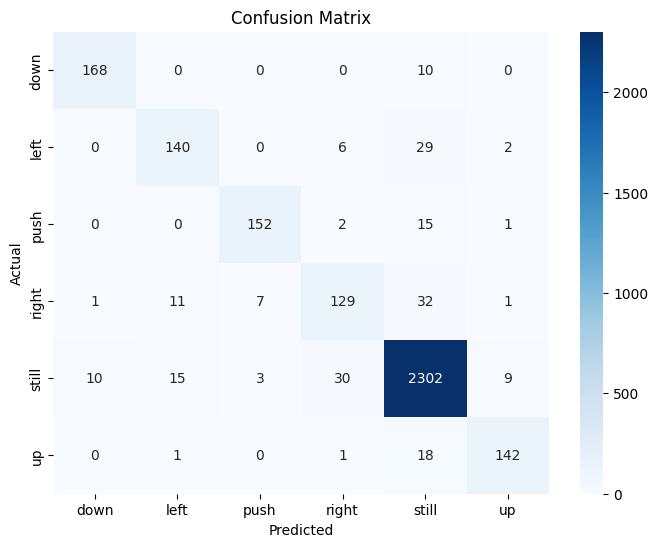


Feature importance visualization not available for rbf kernel.


In [26]:
# Make predictions
y_pred = best_svm.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature importance (for linear kernel only)
if best_svm.kernel == 'linear':
    feature_importance = np.abs(best_svm.coef_[0])
    feature_names = feature_columns
    
    plt.figure(figsize=(10, 6))
    indices = np.argsort(feature_importance)[::-1]
    plt.bar(range(len(feature_importance)), feature_importance[indices])
    plt.xticks(range(len(feature_importance)), [feature_names[i] for i in indices], rotation=45)
    plt.title('Feature Importance (Linear SVM)')
    plt.ylabel('Absolute Coefficient Value')
    plt.tight_layout()
    plt.show()
else:
    print(f"\nFeature importance visualization not available for {best_svm.kernel} kernel.")

## Step 6: Advanced Analysis (Optional)

In [ ]:
# Compare different SVM kernels
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
kernel_results = {}

print("Comparing different SVM kernels:")
for kernel in kernels:
    svm_kernel = SVC(kernel=kernel, random_state=RANDOM_STATE)
    svm_kernel.fit(X_train_scaled, y_train)
    
    # Cross-validation
    cv_scores = cross_val_score(svm_kernel, X_train_scaled, y_train, cv=5)
    
    # Test accuracy
    y_pred_kernel = svm_kernel.predict(X_test_scaled)
    test_accuracy = accuracy_score(y_test, y_pred_kernel)
    
    kernel_results[kernel] = {
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'test_accuracy': test_accuracy
    }
    
    print(f"{kernel.upper()} Kernel:")
    print(f"  CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    print(f"  Test Accuracy: {test_accuracy:.4f}")
    print()

# Visualize kernel comparison
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
cv_means = [kernel_results[k]['cv_mean'] for k in kernels]
cv_stds = [kernel_results[k]['cv_std'] for k in kernels]
plt.bar(kernels, cv_means, yerr=cv_stds, capsize=5)
plt.title('Cross-Validation Accuracy by Kernel')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

plt.subplot(1, 2, 2)
test_accs = [kernel_results[k]['test_accuracy'] for k in kernels]
plt.bar(kernels, test_accs)
plt.title('Test Accuracy by Kernel')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

Comparing different SVM kernels:


## Step 7: Model Deployment and Prediction Function

In [ ]:
# Create a prediction function for new data
def predict_activity(meanX, sdX, rangeX, meanY, sdY, rangeY, meanZ, sdZ, rangeZ, wristArmed):
    """
    Predict activity based on motion sensor features
    
    Parameters:
    - meanX, sdX, rangeX: X-axis statistics
    - meanY, sdY, rangeY: Y-axis statistics  
    - meanZ, sdZ, rangeZ: Z-axis statistics
    - wristArmed: 0 or 1 indicating wrist position
    
    Returns:
    - Predicted activity label
    - Prediction probability
    """
    # Create feature vector as numpy array with proper dtype
    features = np.array([[meanX, sdX, rangeX, meanY, sdY, rangeY, 
                         meanZ, sdZ, rangeZ, wristArmed]], dtype=np.float32)
    
    # Scale the features - using numpy array avoids feature name warnings
    features_scaled = scaler.transform(features)
    
    # Make prediction with explicit dtype casting
    prediction_encoded = best_svm.predict(features_scaled.astype(np.float32))[0]
    prediction_proba = None
    
    # Get probabilities if available
    if hasattr(best_svm, 'predict_proba'):
        prediction_proba = best_svm.predict_proba(features_scaled.astype(np.float32))[0]
    
    # Decode the prediction
    prediction_label = label_encoder.inverse_transform([int(prediction_encoded)])[0]
    
    return prediction_label, prediction_proba

# Example prediction
print("Example prediction:")
sample_features = X_test.iloc[0]  # Use first test sample
predicted_label, proba = predict_activity(*sample_features)
actual_label = label_encoder.inverse_transform([y_test[0]])[0]

print(f"Input features: {sample_features.to_dict()}")
print(f"Predicted activity: {predicted_label}")
print(f"Actual activity: {actual_label}")
if proba is not None:
    print(f"Prediction probabilities: {dict(zip(label_encoder.classes_, proba))}")

# Save the model (optional)
import joblib

# Save the trained model, scaler, and label encoder
joblib.dump(best_svm, 'svm_motion_classifier.pkl')
joblib.dump(scaler, 'feature_scaler.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')

print("\nModel, scaler, and label encoder saved to disk.")

Example prediction:
Input features: {'meanX': 1.0347, 'sdX': 0.0344, 'rangeX': 0.1424, 'meanY': -0.0097, 'sdY': 0.1056, 'rangeY': 0.3425, 'meanZ': -0.0789, 'sdZ': 0.0575, 'rangeZ': 0.1881, 'wristArmed': 1.0}
Predicted activity: push
Actual activity: still

Model, scaler, and label encoder saved to disk.


/Users/samuelnance/IAB330/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Step 8: Sharing the Trained Model

There are several ways to get your trained model to the Raspberry Pi without retraining:

In [ ]:
# Method 1: Include model files in Git repository
print("Current model files:")
import os
model_files = ['svm_motion_classifier.pkl', 'feature_scaler.pkl', 'label_encoder.pkl']
for file in model_files:
    if os.path.exists(file):
        size = os.path.getsize(file) / 1024  # Size in KB
        print(f"✅ {file}: {size:.1f} KB")
    else:
        print(f"❌ {file}: Not found")

# Method 2: Create a simple model loader for the Pi
def load_trained_model():
    """
    Load the pre-trained SVM model, scaler, and label encoder
    Use this function on the Raspberry Pi to load the model
    """
    import joblib
    import numpy as np
    
    try:
        # Load the trained components
        model = joblib.load('svm_motion_classifier.pkl')
        scaler = joblib.load('feature_scaler.pkl') 
        encoder = joblib.load('label_encoder.pkl')
        
        print("✅ Pre-trained model loaded successfully!")
        print(f"📊 Model type: {type(model).__name__}")
        print(f"🏷️  Available labels: {list(encoder.classes_)}")
        
        return model, scaler, encoder
    except FileNotFoundError as e:
        print(f"❌ Model file not found: {e}")
        print("💡 Make sure you've trained and saved the model first")
        return None, None, None

def predict_with_loaded_model(model, scaler, encoder, features):
    """
    Helper function to make predictions with proper data type handling
    """
    # Ensure features are numpy array with float32 dtype
    if not isinstance(features, np.ndarray):
        features = np.array(features, dtype=np.float32)
    else:
        features = features.astype(np.float32)
    
    # Reshape if needed (ensure 2D array)
    if features.ndim == 1:
        features = features.reshape(1, -1)
    
    # Scale features
    features_scaled = scaler.transform(features)
    
    # Make prediction
    prediction_encoded = model.predict(features_scaled.astype(np.float32))[0]
    prediction_label = encoder.inverse_transform([int(prediction_encoded)])[0]
    
    return prediction_label

# Test the loader
print("\n🧪 Testing model loader:")
loaded_model, loaded_scaler, loaded_encoder = load_trained_model()

if loaded_model is not None:
    # Test prediction with the same sample using proper data handling
    sample_features = X_test.iloc[0].values  # Convert to numpy array
    prediction_label = predict_with_loaded_model(loaded_model, loaded_scaler, loaded_encoder, sample_features)
    actual_label = label_encoder.inverse_transform([y_test[0]])[0]
    print(f"✅ Test prediction: {prediction_label}")
    print(f"🎯 Actual label: {actual_label}")
    print(f"✅ Match: {'Yes' if prediction_label == actual_label else 'No'}")